In [ ]:
import pandas as pd

In [ ]:
df1 = pd.read_csv('/content/city_day.csv')

In [ ]:
df1.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [ ]:
df1.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

##**Calculating For Bengaluru**

In [ ]:
# df.iloc['Ahmedabad',:]
df = df1[df1['City']=='Bengaluru']

In [ ]:
df.set_index(pd.RangeIndex(2009),inplace=True)
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Bengaluru,2015-01-01,NaN,NaN,3.26,17.33,10.88,20.36,0.33,3.54,10.73,0.56,4.64,NaN,NaN,NaN
1,Bengaluru,2015-01-02,NaN,NaN,6.05,19.73,14.14,23.74,1.35,3.97,22.77,0.65,5.31,NaN,NaN,NaN
2,Bengaluru,2015-01-03,NaN,NaN,11.91,19.88,20.72,4.32,17.40,13.61,12.03,0.53,19.25,NaN,NaN,NaN
3,Bengaluru,2015-01-04,NaN,NaN,7.45,21.61,16.88,0.87,5.05,6.52,17.70,0.55,7.47,NaN,NaN,NaN
4,Bengaluru,2015-01-05,NaN,NaN,9.52,22.17,21.76,31.38,1.83,4.71,12.72,0.40,4.36,NaN,NaN,NaN


##Understanding The Data

In [ ]:
df['AQI_Bucket'].value_counts()

Satisfactory    1124
Moderate         630
Good             115
Poor              36
Very Poor          5
Name: AQI_Bucket, dtype: int64

In [ ]:
df.isnull().sum()

City             0
Date             0
PM2.5          146
PM10           360
NO               6
NO2              6
NOx              4
NH3            203
CO              11
SO2              6
O3             144
Benzene        266
Toluene         93
Xylene        2009
AQI             99
AQI_Bucket      99
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2009 entries, 0 to 2008
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        2009 non-null   object 
 1   Date        2009 non-null   object 
 2   PM2.5       1863 non-null   float64
 3   PM10        1649 non-null   float64
 4   NO          2003 non-null   float64
 5   NO2         2003 non-null   float64
 6   NOx         2005 non-null   float64
 7   NH3         1806 non-null   float64
 8   CO          1998 non-null   float64
 9   SO2         2003 non-null   float64
 10  O3          1865 non-null   float64
 11  Benzene     1743 non-null   float64
 12  Toluene     1916 non-null   float64
 13  Xylene      0 non-null      float64
 14  AQI         1910 non-null   float64
 15  AQI_Bucket  1910 non-null   object 
dtypes: float64(13), object(3)
memory usage: 251.2+ KB


In [ ]:
# the Xylene has 0 non-null value means all the values as null so it's better to drop this feature
df.drop(['Xylene','City','Date'],axis=1,inplace = True)

<ipython-input-12-f29a0d257797>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['Xylene','City','Date'],axis=1,inplace = True)


In [ ]:
df.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket
0,NaN,NaN,3.26,17.33,10.88,20.36,0.33,3.54,10.73,0.56,4.64,NaN,NaN
1,NaN,NaN,6.05,19.73,14.14,23.74,1.35,3.97,22.77,0.65,5.31,NaN,NaN
2,NaN,NaN,11.91,19.88,20.72,4.32,17.40,13.61,12.03,0.53,19.25,NaN,NaN
3,NaN,NaN,7.45,21.61,16.88,0.87,5.05,6.52,17.70,0.55,7.47,NaN,NaN
4,NaN,NaN,9.52,22.17,21.76,31.38,1.83,4.71,12.72,0.40,4.36,NaN,NaN


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.corr()['AQI']

<ipython-input-15-dd995d1c7b1b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['AQI']


PM2.5      0.427192
PM10       0.599427
NO         0.117000
NO2        0.230220
NOx        0.150846
NH3        0.074217
CO         0.383252
SO2        0.025575
O3         0.264888
Benzene    0.162421
Toluene    0.106117
AQI        1.000000
Name: AQI, dtype: float64

##EDA (Exploratry Data Visualization)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

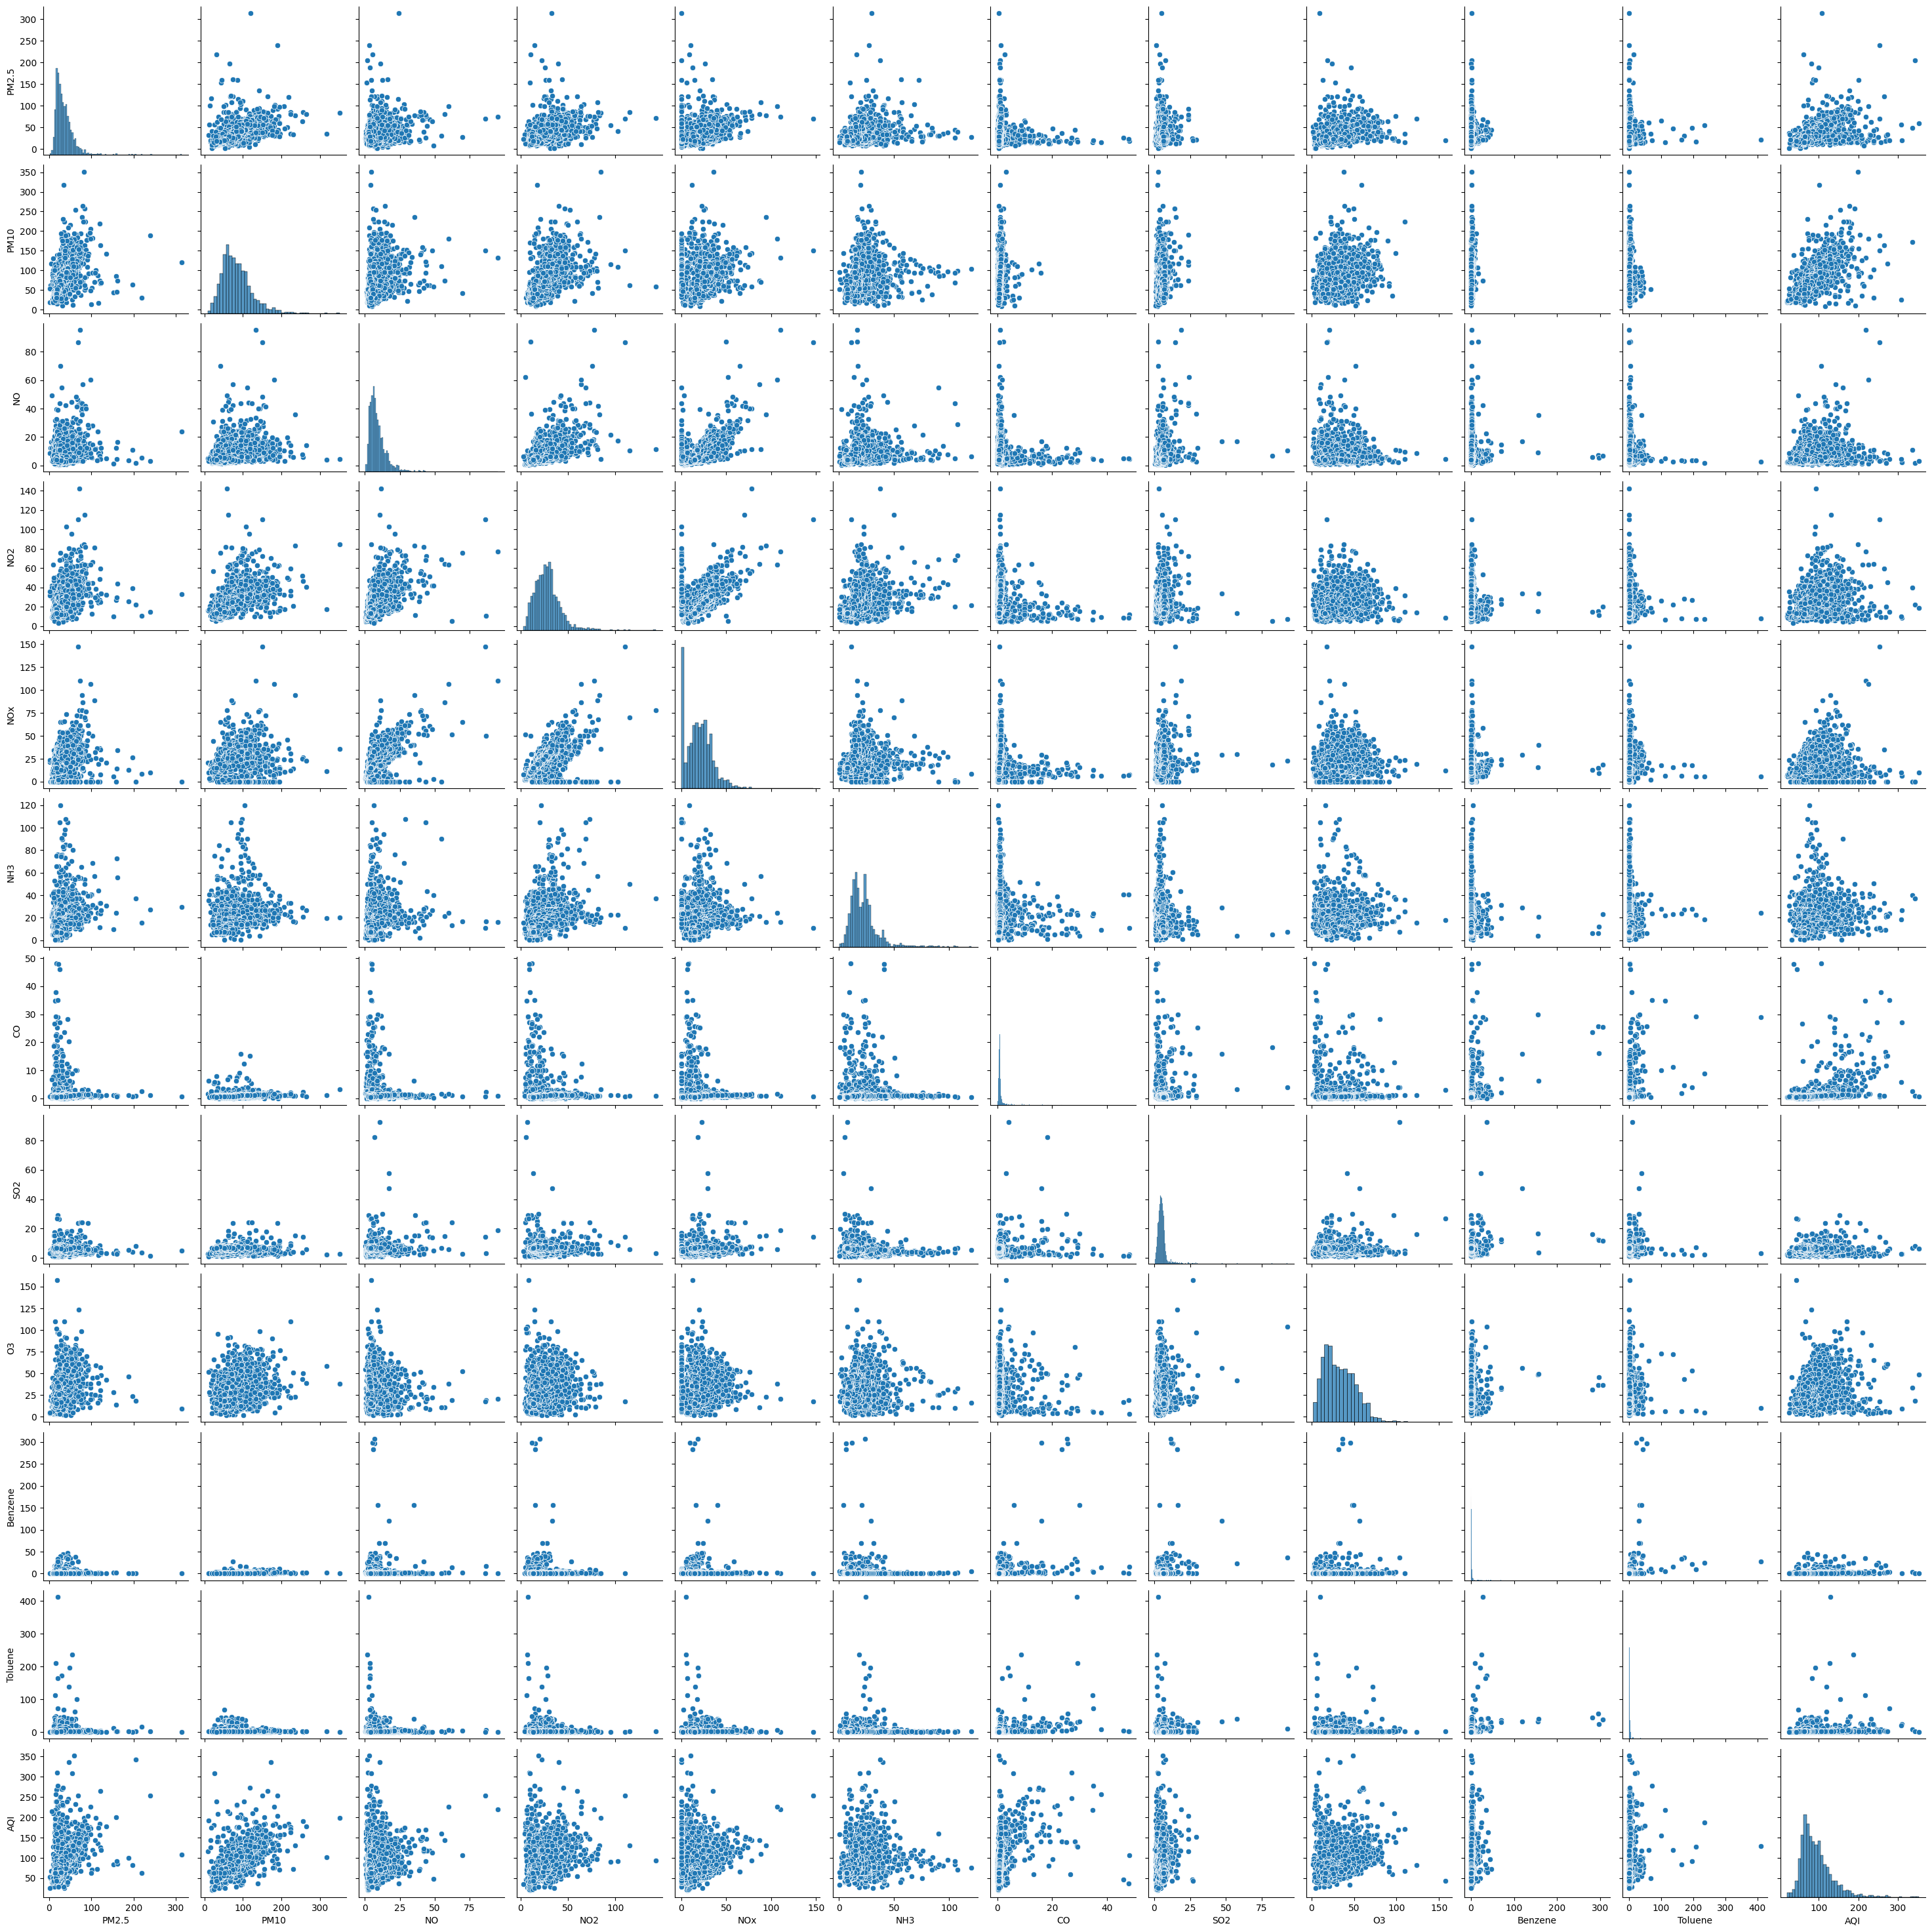

In [ ]:
sns.pairplot(df)

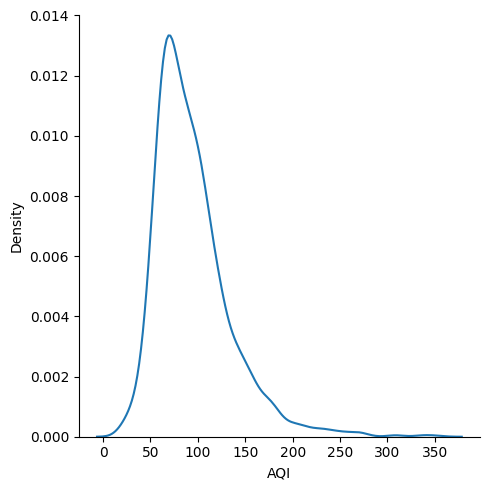

In [ ]:
sns.displot(df['AQI'], kind='kde')

<Axes: >

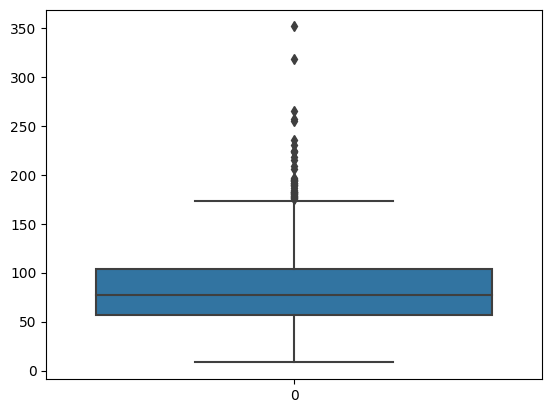

In [ ]:
sns.boxplot(df['PM10'])

<ipython-input-20-6cf3c1651808>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap="RdYlGn")


<Axes: >

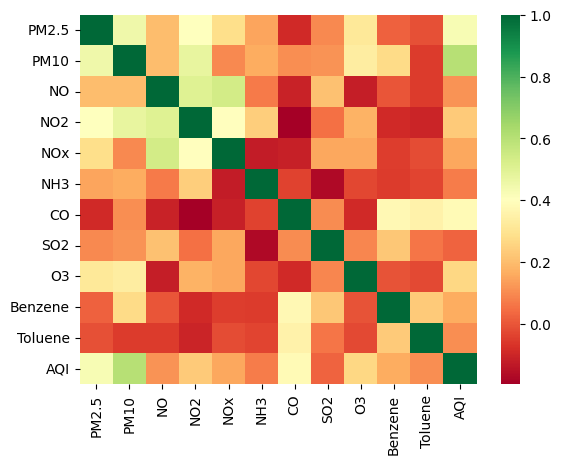

In [ ]:
sns.heatmap(df.corr(),cmap="RdYlGn")

## feature engineering

In [ ]:
df.isnull().sum()

PM2.5         146
PM10          360
NO              6
NO2             6
NOx             4
NH3           203
CO             11
SO2             6
O3            144
Benzene       266
Toluene        93
AQI            99
AQI_Bucket     99
dtype: int64

In [ ]:

from sklearn.model_selection import train_test_split

In [ ]:
df.dropna(inplace=True)

<ipython-input-23-c64f9f573c18>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [ ]:
X = df.drop(['AQI','AQI_Bucket'],axis=1)
y = df['AQI'] # predciting AQI and AQI_bucket can be classified by value of AQI

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)

(1092, 11)
(273, 11)


In [ ]:
y_test.isnull().sum()

0

In [ ]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()

X_train_a = std.fit_transform(X_train)
X_test_a = std.transform(X_test)

## Modeling

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
clf = LinearRegression()
clf.fit(X_train_a,y_train)

LinearRegression()

In [ ]:
y_pred = clf.predict(X_test_a)
y_pred

array([ 66.22621902, 122.18714735,  97.93978388, 107.51590105,
       108.21891325,  70.87082351,  93.91464605, 187.13577568,
        73.53186546,  71.16760333,  60.57392189, 104.76553515,
        53.03870558, 115.98866071,  69.27923454, 103.52062852,
        93.96782205, 138.55011322, 110.36517648,  81.69015717,
       128.52342549,  99.46122555,  71.6605728 ,  96.65632992,
       113.79453951,  97.62375071, 126.72552032,  69.60906465,
        65.05370746, 112.84494801,  86.98049744, 103.82702876,
        74.75998674,  47.19575801,  68.43551752, 124.68725584,
       133.65288096, 178.28975702, 105.93563508,  72.99434825,
        67.67404005, 105.30029932, 165.44729346, 110.45106404,
        72.14568287, 108.28140429,  63.48734365,  61.52903488,
       118.48485886, 105.62889416,  88.1528325 , 101.48501325,
        97.35919525,  62.59772529,  96.19569496,  76.29271622,
       116.13253465, 111.83634798,  55.22138106, 112.84915021,
        55.1385019 ,  80.98783355, 106.37264447, 139.25

In [ ]:
clf.coef_

array([11.540631  , 10.69663233,  4.20597455, -0.02935974,  0.98311535,
        0.38058468, 12.60570598, -0.36193603,  7.78407701,  0.56691947,
       -0.70150237])

In [ ]:
from sklearn.metrics import r2_score # evalution

In [ ]:
r2_score(y_test, y_pred)

0.7415535141003398

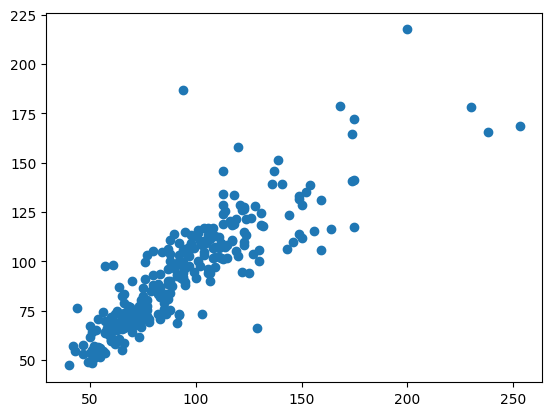

In [ ]:
plt.scatter(y_test,y_pred)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
clf1 = DecisionTreeRegressor()
clf1.fit(X_train,y_train) # Non normalized data

DecisionTreeRegressor()

In [ ]:
y_pred1 = clf1.predict(X_test)

In [ ]:
clf1.score(X_test,y_test)

0.4832270609274586

In [ ]:
# Hyperparameter tunning

parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
            }

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
tuning_model=GridSearchCV(clf1,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=3)

In [ ]:
tuning_model.fit(X_train,y_train)

Fitting 3 folds for each of 140 candidates, totalling 420 fits
[CV 1/3] END max_depth=1, min_samples_leaf=1, splitter=best;, score=-934.065 total time=   0.0s
[CV 2/3] END max_depth=1, min_samples_leaf=1, splitter=best;, score=-780.441 total time=   0.0s
[CV 3/3] END max_depth=1, min_samples_leaf=1, splitter=best;, score=-848.573 total time=   0.0s
[CV 1/3] END max_depth=1, min_samples_leaf=1, splitter=random;, score=-1166.636 total time=   0.0s
[CV 2/3] END max_depth=1, min_samples_leaf=1, splitter=random;, score=-742.258 total time=   0.0s
[CV 3/3] END max_depth=1, min_samples_leaf=1, splitter=random;, score=-1036.599 total time=   0.0s
[CV 1/3] END max_depth=1, min_samples_leaf=2, splitter=best;, score=-934.065 total time=   0.0s
[CV 2/3] END max_depth=1, min_samples_leaf=2, splitter=best;, score=-780.441 total time=   0.0s
[CV 3/3] END max_depth=1, min_samples_leaf=2, splitter=best;, score=-848.573 total time=   0.0s
[CV 1/3] END max_depth=1, min_samples_leaf=2, splitter=random;, s

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 12],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error', verbose=3)

In [ ]:
tuning_model.best_params_

{'max_depth': 9, 'min_samples_leaf': 10, 'splitter': 'best'}

In [ ]:
tuning_model.best_score_

-448.5876204879392

In [ ]:
y_pre1 = tuning_model.predict(X_test)

In [ ]:
r2_score(y_test,y_pre1)

0.5802994150843873

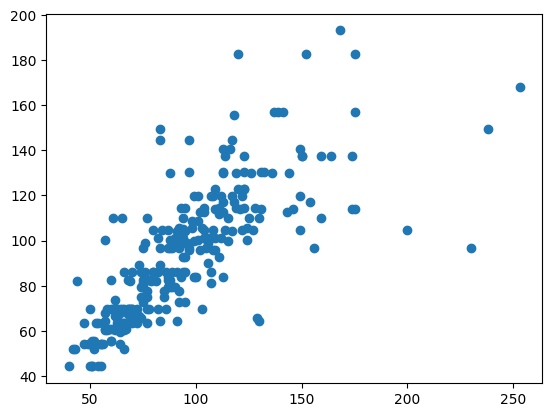

In [ ]:
plt.scatter(y_test,y_pre1)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
clf3 = RandomForestRegressor()

In [ ]:
clf3.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
y_pred2 = clf3.predict(X_test)

In [ ]:
clf3.score(X_test,y_test)

0.7826122709981201

In [ ]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(clf3,X,y,cv=5)

In [ ]:
score.mean()

0.6627037414861665

In [ ]:
params = {
    'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800],
    'max_depth': [5, 9, 11,14,17,None]
    # 'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10]
}

In [ ]:
rf  = GridSearchCV(clf3,param_grid=params,scoring='neg_mean_squared_error',cv=3,verbose=3)

In [ ]:
rf.fit(X_train,y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV 1/3] END ..max_depth=5, n_estimators=100;, score=-436.424 total time=   0.3s
[CV 2/3] END ..max_depth=5, n_estimators=100;, score=-327.638 total time=   0.3s
[CV 3/3] END ..max_depth=5, n_estimators=100;, score=-314.961 total time=   0.3s
[CV 1/3] END ..max_depth=5, n_estimators=200;, score=-439.629 total time=   0.7s
[CV 2/3] END ..max_depth=5, n_estimators=200;, score=-330.227 total time=   0.7s
[CV 3/3] END ..max_depth=5, n_estimators=200;, score=-314.120 total time=   0.7s
[CV 1/3] END ..max_depth=5, n_estimators=300;, score=-439.881 total time=   1.5s
[CV 2/3] END ..max_depth=5, n_estimators=300;, score=-325.845 total time=   1.4s
[CV 3/3] END ..max_depth=5, n_estimators=300;, score=-301.437 total time=   1.0s
[CV 1/3] END ..max_depth=5, n_estimators=400;, score=-437.881 total time=   1.3s
[CV 2/3] END ..max_depth=5, n_estimators=400;, score=-322.802 total time=   1.4s
[CV 3/3] END ..max_depth=5, n_estimators=400;, 

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 9, 11, 14, 17, None],
                         'n_estimators': [100, 200, 300, 400, 500, 600, 700,
                                          800]},
             scoring='neg_mean_squared_error', verbose=3)

In [ ]:
rf.best_params_

{'max_depth': None, 'n_estimators': 800}

In [ ]:
rf.best_score_

-323.3527144316621

In [ ]:
y_pre2 = rf.predict(X_test)

In [ ]:
r2_score(y_test,y_pre2)

0.7902355340342947

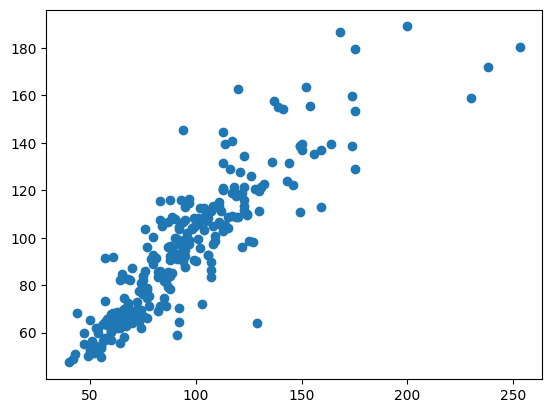

In [ ]:
plt.scatter(y_test,y_pre2)